In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Machine learning packages
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV,LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets, linear_model


import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

### Read dataset from pickle file containing processed data

In [3]:
df = pd.read_pickle('temp_df_2.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468027 entries, 0 to 16468026
Data columns (total 22 columns):
 #   Column       Dtype  
---  ------       -----  
 0   uid          int64  
 1   click_nb     int64  
 2   cost         float64
 3   cpo          float64
 4   click_pos    int64  
 5   attribution  int64  
 6   conversion   int64  
 7   click        int64  
 8   cat1_num     float64
 9   cat2_num     float64
 10  cat3_num     float64
 11  cat4_num     float64
 12  cat5_num     float64
 13  cat6_num     float64
 14  cat7_num     float64
 15  cat8_num     float64
 16  cat9_num     float64
 17  day          int64  
 18  hour         int64  
 19  last_click   int64  
 20  first_click  int64  
 21  delta        int64  
dtypes: float64(11), int64(11)
memory usage: 2.7 GB


## Model Summary

Inorder to predict the optimal bid price, we need to calculate range of prices where there is more conversion than no conversion. To calculate that, we need the conversions that have max probaility of occurances. That being said, logistic regression not only helps in classification but also can predict the probability of the 1's and 0's occuring. Thus, I'm leveraging the probability offered by logistic regression to calculate the top 10% of rows that have more probability of conversion. After that, I'm factoring the data to calulate the optimal price range.

Here we are analyzing with the goal of finding the optimal price range while maximizing the conversions from the ad impressions.

### Logistic regression
* Predicted whether a particular impression would convert or not
* Accuracy: 99.5%

In [5]:
y = df['conversion']
X = df.drop(['conversion','attribution','uid'],axis=1)

In [6]:
#Created test/train data split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [8]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.999567647079541
Precision: 1.0
Recall: 0.9911674804493669


### Calculating the probabilty of occurances of conversion to the data 

In [11]:
myarray = logreg.predict_proba(X)
df_2 = pd.DataFrame(myarray, columns = ['pred_0','pred_1'])

In [12]:
df = df.join(df_2['pred_1'])

### Sorting the data to arrange according to the top conversion probability

In [13]:
df.sort_values(by='pred_1',ascending=False)

,uid,click_nb,cost,cpo,click_pos,attribution,conversion,click,cat1_num,cat2_num,...,cat6_num,cat7_num,cat8_num,cat9_num,day,hour,last_click,first_click,delta,pred_1
15527976,3475645,1,0.000033,0.006014,0,0,1,1,5.0,4.0,...,5.0,1.0,5.0,5.0,29,700,0,0,273174,1.000000
16435655,31337166,1,0.000099,0.004000,0,0,1,1,5.0,5.0,...,5.0,3.0,5.0,5.0,30,740,0,0,227548,1.000000
16435633,16583215,2,0.000172,0.134675,1,0,1,1,5.0,5.0,...,5.0,4.0,5.0,5.0,30,740,0,0,162032,1.000000
11532277,2028844,11,0.000316,0.051333,6,0,1,1,5.0,5.0,...,5.0,5.0,5.0,5.0,21,513,0,0,1156233,1.000000
790005,24127524,28,0.008586,0.055916,9,0,1,1,5.0,5.0,...,5.0,5.0,5.0,5.0,1,36,0,0,275714,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16457642,10520904,-1,0.000091,0.302274,-1,0,0,1,5.0,5.0,...,5.0,5.0,5.0,5.0,30,741,0,0,-1,0.000136
16465527,22074857,-1,0.000181,0.302274,-1,0,0,1,5.0,5.0,...,5.0,5.0,5.0,5.0,30,741,0,0,-1,0.000136
16466318,11127190,-1,0.001010,0.302274,-1,0,0,1,5.0,5.0,...,5.0,5.0,5.0,5.0,30,741,0,0,-1,0.000136
16467695,24936208,-1,0.001029,0.302274,-1,0,0,1,5.0,5.0,...,5.0,5.0,5.0,5.0,30,741,0,0,-1,0.000136


### Retrieving the top 10% of the rows

In [24]:
df_rank = df.sort_values(by='pred_1',ascending=False).head(int(len(df)/10))

### Calculation of metrics: CPO per customer where there is conversion and no-conversion

In [26]:
df_X = df_rank.groupby(['conversion','uid']).agg({'cpo': ['mean'],'uid':['count']}).reset_index()


In [27]:
df_X.columns = ['_'.join(col) for col in df_X.columns.values]
print(df_X)

        conversion_      uid_  cpo_mean  uid_count
0                 0        53  0.242560          2
1                 0       167  0.075868          1
2                 0       313  0.078042          1
3                 0       435  0.010242          1
4                 0       436  0.320965          2
...             ...       ...       ...        ...
951262            1  32458202  0.102344          5
951263            1  32458575  0.165650          1
951264            1  32458592  0.149125          2
951265            1  32458740  0.317035          1
951266            1  32458754  0.004000          1

[951267 rows x 4 columns]


### Plotting the CPO vs # of Customer for converted impressions 

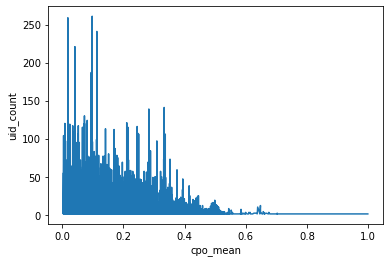

In [42]:
sns.lineplot(x='cpo_mean', y="uid_count",ci=50,
            data=df_X[df_X.conversion_==1])

### Plotting the CPO vs # of Customer for non converted impressions 

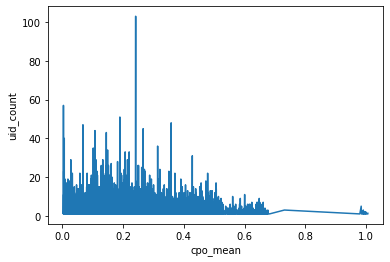

In [43]:
sns.lineplot(x='cpo_mean', y="uid_count",ci=50,
        data=df_X[df_X.conversion_==0])

### Final Takeaways

From both the plots we see that the Conversion plot dominates the non-converted plots when the CPO is in between 0.05 - 0.1 USD per order. At these rates there exists a good probability of conversion that makes this price range as the optimal price range that needs to be targetted to ensure quality conversion of impressions. 
